### ASTR 8070: Astrostatistics
***S. R. Taylor***
___

# Homework 9
### Due: Saturday, Apr 24th at 11.59pm CDT
---

The first two homework problems this week are very subjective, and necessarily deal with some randomization in your solutions. Do your best to fully catalog your tests, checks, and thought process as you answer. 

In [20]:
import numpy as np
from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 15,8
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve
from sklearn.model_selection import GridSearchCV



1. The model as given combines two input features into a single neuron with a linear activation of form $f(x) = x$. Write down an equation that algebraically describes the output of this network, in terms of the synapse weights, the neuron bias, and the input data. Based on your equation, will this model learn any nonlinearities? Run the network to confirm your guess.

$$output = w_{2,1}(b_{2,1}+w_{1,1}x_1+w_{1,2}x_2) $$

where $w_{2,1}$ is the weight from the hidden node to the output, $b_{2,1}$ is the bias value for the hidden node, $w_{1,1}$ is the weight connecting the first input, $x_1$ to the hidden node, and $w_{1,2}$ is the weight connecting the second input, $x_2$ to the hidden node. Because the activation function is linear, this model will not learn any nonlinearities. Running the network confirms this.

2. Try increasing the number of neurons in the hidden layer from 1 to 2, and also try changing from a Linear activation to a nonlinear activation like ReLU. Can you create a model that can learn nonlinearities? Can it model the data effectively? Check through multiple re-runs. *Note that you can hover over the neurons to see which features they are identifying.*

This model can learn nonlinearities, but it isn't complex enough to model the data effectively.

3. Try increasing the number of neurons in the hidden layer from 2 to 3, using a nonlinear activation like ReLU. Can it model the data effectively? How does model quality vary from run to run?

This network can model the data effectively, but it can often get stuck in local minima that do not model the data effectively, so it will only model the data well on some runs.

4. Continue experimenting by adding or removing hidden layers and neurons per layer. Also feel free to change learning rates, regularization, and other learning settings. What is the smallest number of neurons and layers you can use that gives test loss of 0.177 or lower?

I was able to get a test loss of 0.162 with a network with 3 hidden layers with 3 neurons per layer, with L2 regularization of 0.003 and ReLU activation

5. Does increasing the model size improve the fit, or how quickly it converges? Does this change how often it converges to a good model? For example, try the following architecture:

- First hidden layer with 3 neurons.
- Second hidden layer with 3 neurons.
- Third hidden layer with 2 neurons.

This architecture quickly converges and seems to always converge to a good model. Less complex models (like the model from part 3.) sometimes converge quickly to a good model, sometimes do no converge to a good model, and sometimes take a long time to converge to a good model.

## Problem 2


[This](https://playground.tensorflow.org/#activation=relu&regularization=L2&batchSize=10&dataset=spiral&regDataset=reg-plane&learningRate=0.1&regularizationRate=0.01&noise=50&networkShape=3,2&seed=0.65406&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) data set is a noisy spiral. Obviously, a linear model will fail here, but even manually defined feature combinations may be hard to construct.

1. Train the best model you can, using just X1 and X2. Add or remove layers and neurons as you see fit, change learning settings like learning rate, regularization rate, and batch size. What is the best test loss you can get? How smooth is the model output surface?

I was able to get a test loss of 0.175 with 3 layers and 4 neurons per layer. This required removing the regularization and changing the learning rate during training (start with a larger learning rate and then reduce the learning rate once it finds a good location). The model output surface was not smooth though and there was definitely some overfitting.


2. Even with Neural Nets, some amount of feature engineering is often needed to achieve best performance. Try adding in additional cross product features or other transformations like sin(X1) and sin(X2). Do you get a better model? Is the model output surface any smoother?

Adding these terms I was able to slightly improve the test loss for a network with the same hidden layers, but I got a model output surface that was much closer to the real shape.

![title](spiral_model_surface.png)

## Problem 3

The first few steps of this problem are the same as last week's homework.


1. Use the following code snippet to read in SDSS galaxy color data.
```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```
Slice the data array to only take every other $10$th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.


3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).


4. Scale your training and testing data to prepare it for the DNN. 


5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 


6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!


# Solution

1. Use the following code snippet to read in SDSS galaxy color data.
```
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()
```
Slice the data array to only take every other $10$th row. From this reduced data volume, create arrays of $(u-g)$, $(g-r)$, $(r-i)$, and $(i-z)$ colors. Also create arrays of redshift and the spectral class. 

In [3]:
from astroML.datasets import fetch_sdss_galaxy_colors
data = fetch_sdss_galaxy_colors()

print(data.dtype)
ug=data['u']-data['g']
gr=data['g']-data['r']
ri=data['r']-data['i']
iz=data['i']-data['z']
redshift=data['redshift']
labels=data['specClass']
labels_01=np.where(labels=='GALAXY',0,1) #galaxy is 0, QSO is 1

[('u', '<f8'), ('g', '<f8'), ('r', '<f8'), ('i', '<f8'), ('z', '<f8'), ('specClass', '<U6'), ('redshift', '<f8'), ('redshift_err', '<f8')]


2. We're going to make classification pretty tough for our deep neural network. Make a scatter plot of $(r-i)$ versus $(i-z)$, color coding by galaxy or quasar class. Notice how much more difficult the visual discrimination is compared to $(u-g)$ versus $(g-r)$. The plot should include appropriate axis labels and a legend.

Text(0, 0.5, '(i-z)')

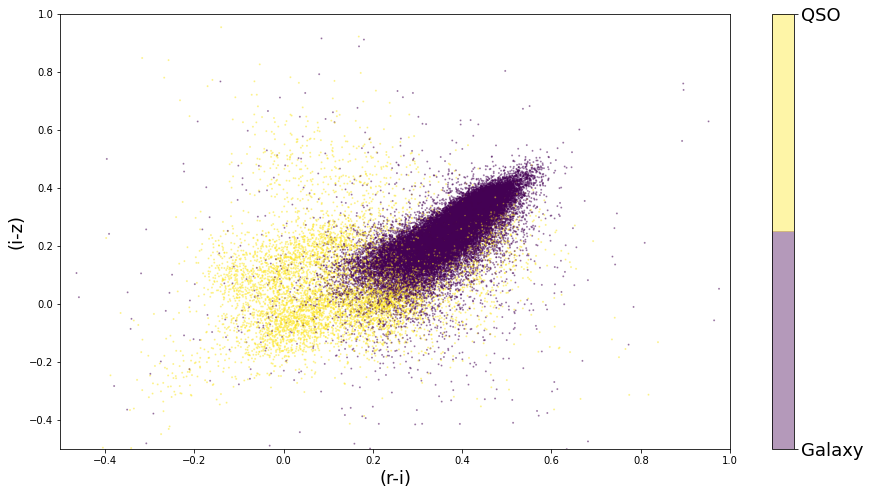

In [7]:
plt.axis([-0.5,1,-0.5,1])
plt.scatter(ri,iz,c=labels_01,cmap=plt.cm.get_cmap('viridis', 2),alpha=0.4,s=1)
cbar=plt.colorbar(ticks=[0,1])
cbar.ax.set_yticklabels(['Galaxy','QSO'],fontsize=18)
plt.xlabel('(r-i)',fontsize=18)
plt.ylabel('(i-z)',fontsize=18)

3. Stack the $(r-i)$ and $(i-z)$ colors into a data matrix, $X$. Create a target label array that has $0$ for a regular galaxy and $1$ for a quasar. Perform a train-test split, taking $20\%$ of the data for testing. Set the `random_state` in your train-test split to be `42` for reproducibility (and easy comparison with my solutions).

In [12]:
X=np.zeros(shape=(len(ri),2))
X[:,0]=ri
X[:,1]=iz
y=labels_01


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

4. Scale your training and testing data to prepare it for the DNN. 

In [14]:
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)
X_scaled = preprocessing.scale(X)

5. Train scikit-learn's multi-layer perceptron classifier with ReLU activation, stochastic gradient descent, two hidden layers of respective sizes of $5$ and $2$, and using `max_iter=1000`, and `random_state=42`. As with classifiers in last week's homework, plot an ROC curve that shows the network's performance on the scaled testing data. 

Text(0.5, 1.0, 'MLP Testing Data ROC Curve')

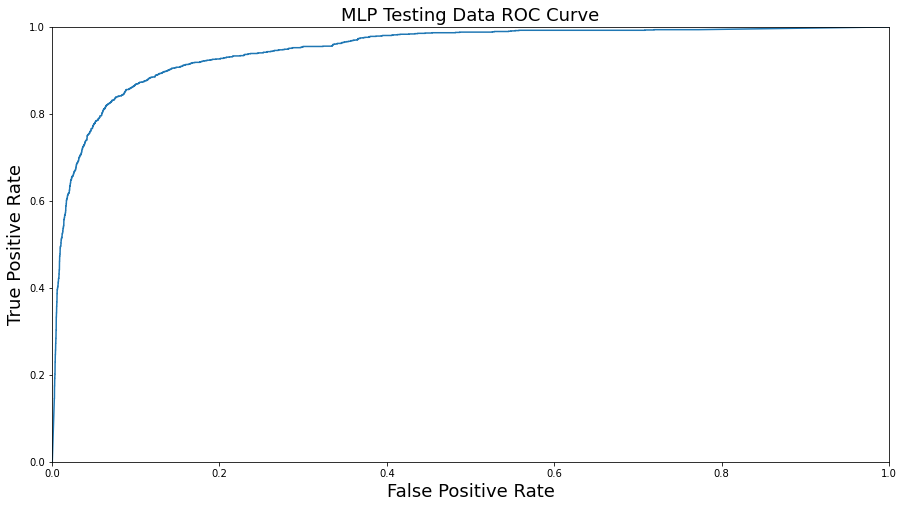

In [24]:
clf = MLPClassifier(hidden_layer_sizes=(5,2),
                    activation='relu',
                    solver='sgd',
                    max_iter=1000,
                    random_state=42)

clf.fit(X_train_scaled,y_train)

probs=clf.predict_proba(X_test_scaled)
QSO_probs=probs[:,1]
    
# roc_curve accepts positive class probabilities for y_score
fpr,tpr,thresholds=roc_curve(y_test,QSO_probs,pos_label=1)

plt.axis([0,1,0,1])
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('MLP Testing Data ROC Curve',fontsize=18)



6. Now let's optimize the hyperparameters of your network. You will use `GridSearchCV` with the following hyperparameters for the network:

```
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
```

Remember that you can utilize all availables cores on your machine with `n_jobs=-1`. Print out the classification score for the training data, and the best parameters obtained by the cross validation.



In [21]:
parameters = {'solver': ['lbfgs', 'sgd', 'adam'], 
              'hidden_layer_sizes': [(2,2), (5,5), (5,2), (5,5,5)], 
              'activation': ['relu', 'tanh'], 
              'random_state': [42], 'max_iter': [1000]}
K = 5 # Do 5-fold cross validation
grid = GridSearchCV(MLPClassifier(hidden_layer_sizes=(5,2),
                                  activation='relu',
                                  solver='sgd',
                                  max_iter=1000,
                                  random_state=42), 
                    param_grid=parameters, 
                    cv=K,
                    n_jobs=-1) 
grid.fit(X_scaled,y)

print(grid.best_params_)
print(grid.best_score_)



{'activation': 'tanh', 'hidden_layer_sizes': (5, 5), 'max_iter': 1000, 'random_state': 42, 'solver': 'lbfgs'}
0.93618


7. Fit a new DNN using the best hyperparameters obtained in (6), and make a plot that has ROC curves for this new network and your original network. Let the x and y axes have the full limit range of 0 to 1. Voila!

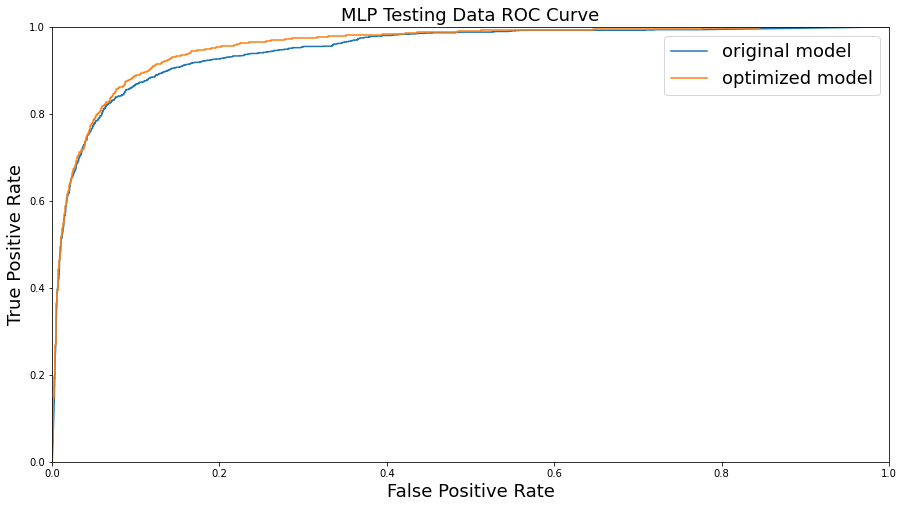

In [23]:
clf = MLPClassifier(hidden_layer_sizes=(5,5),
                    activation='tanh',
                    solver='lbfgs',
                    max_iter=1000,
                    random_state=42)

clf.fit(X_train_scaled,y_train)

probs=clf.predict_proba(X_test_scaled)
QSO_probs=probs[:,1]
    
# roc_curve accepts positive class probabilities for y_score
fpr_opt,tpr_opt,thresholds=roc_curve(y_test,QSO_probs,pos_label=1)

plt.axis([0,1,0,1])
plt.plot(fpr,tpr,label='original model')
plt.plot(fpr_opt,tpr_opt,label='optimized model')
plt.xlabel('False Positive Rate',fontsize=18)
plt.ylabel('True Positive Rate',fontsize=18)
plt.title('MLP Testing Data ROC Curve',fontsize=18)
plt.legend(loc='best',fontsize=18)